In [206]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [207]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [208]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [209]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [210]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_cols = df_market_data.select_dtypes(include=['float64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

print(df_scaled.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [211]:
# Create a DataFrame with the scaled data
df_scaled = df_market_data.copy()

# Copy the crypto names from the original data
crypto_names = df_scaled.index

# Display sample data
print(df_scaled.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

---

### Find the Best Value for k Using the Original Data.

In [212]:
# Create a list with the number of k-values from 1 to 11
import matplotlib.pyplot as plt

# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)  # Range from 1 to 11 (exclusive)

# Display the list of k-values
print(list(k_values))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [213]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)



/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[69983541.80285285, 8193203.593539453, 2592706.8825531797, 835227.4380640758, 437329.5311132971, 269606.06382899976, 199892.1209371259, 157329.52476206073, 118743.87920655252, 93040.66565973038, 73661.39483184108]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [214]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values}
print(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df.head())


{'Number of Clusters (k)': range(1, 12), 'Inertia': [69983541.80285285, 8193203.593539453, 2592706.8825531797, 835227.4380640758, 437329.5311132971, 269606.06382899976, 199892.1209371259, 157329.52476206073, 118743.87920655252, 93040.66565973038, 73661.39483184108]}
   Number of Clusters (k)       Inertia
0                       1  6.998354e+07
1                       2  8.193204e+06
2                       3  2.592707e+06
3                       4  8.352274e+05
4                       5  4.373295e+05


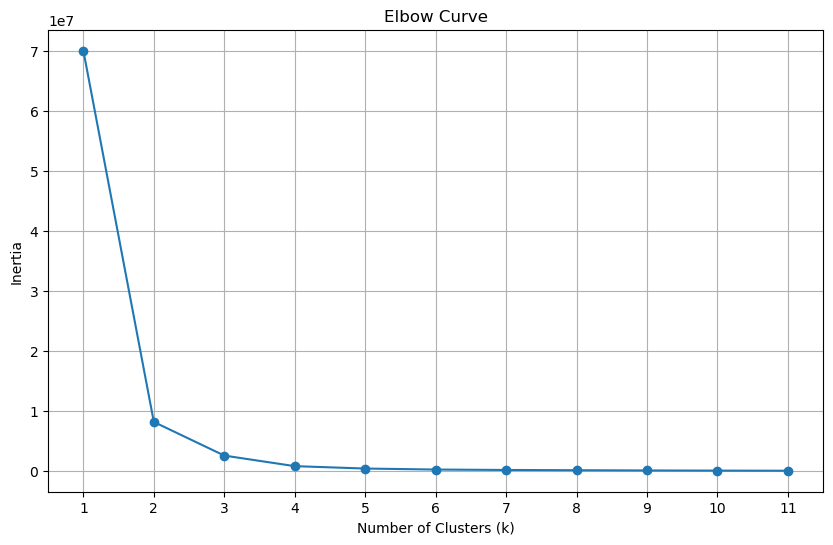

In [215]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?
*Answer:** 2

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [216]:
# Initialize the K-Means model using the best value for k
optimal_k = 2
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_model.fit(df_market_data)
cluster_labels = kmeans_model.labels_

print(cluster_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [217]:
# Fit the K-Means model using the scaled data 
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(df_scaled)
cluster_labels = kmeans_model.labels_

print(cluster_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [218]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [219]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()
# Display sample data from the copy
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [220]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = cluster_labels

# Display sample data with the new column
print(df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [221]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=500)

# Show the scatter plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [222]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [223]:
# Use the PCA model with fit_transform to reduce to three principal components
principal_components = pca_model.fit_transform(df_scaled)

# View the first five rows of the DataFrame
print(principal_components[:5])


[[-341.80096268  -51.36677548   12.52547089]
 [-249.42046633   24.11754777  -14.23146597]
 [-402.61472077 -118.71073742   24.83839662]
 [-406.75243715  -79.48728629    1.56633057]
 [-382.42994789 -103.43195906   16.75307273]]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [224]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

print(explained_variance)


[9.76037313e-01 2.30282949e-02 7.48308214e-04]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 3-4 

In [225]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data


df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['coin_id'] = df_scaled.index
df_pca.set_index('coin_id', inplace=True)
print(df_pca.head())

                    PCA1        PCA2       PCA3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


---

### Find the Best Value for k Using the PCA Data

In [226]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [227]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Display the inertia values
print(inertia_values_pca)


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[69970518.99455082, 8180192.230746055, 2580721.077844291, 823747.1295855558, 426417.5282005227, 259209.7895334508, 189798.09284767613, 147296.66111767665, 108686.33066171285, 85563.61193349786, 66208.48080748717]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [228]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values_pca}

elbow_df_pca = pd.DataFrame(elbow_data_pca)

print(elbow_df_pca.head())


   Number of Clusters (k)       Inertia
0                       1  6.997052e+07
1                       2  8.180192e+06
2                       3  2.580721e+06
3                       4  8.237471e+05
4                       5  4.264175e+05


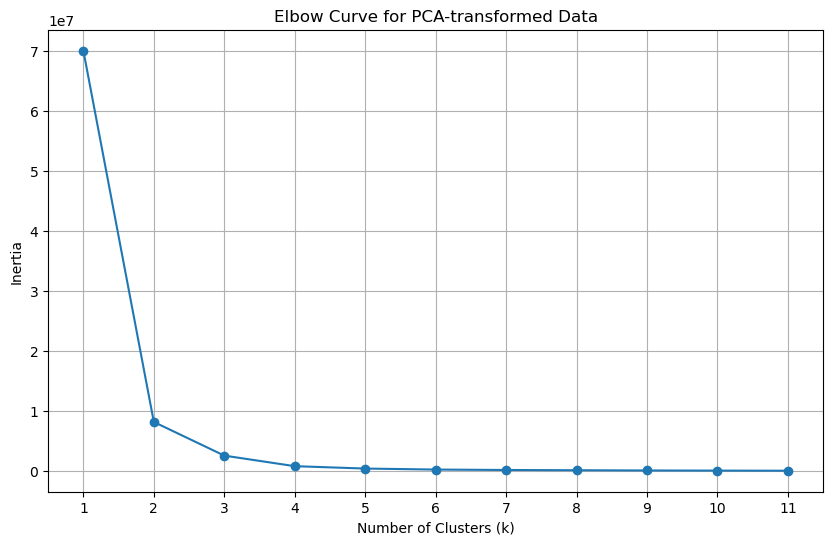

In [229]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-')
plt.title('Elbow Curve for PCA-transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [230]:
# Initialize the K-Means model using the best value for k

optimal_k = 2
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_model.fit(df_pca)
cluster_labels_pca = kmeans_pca_model.labels_
print(cluster_labels_pca)


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


In [231]:
# Fit the K-Means model using the PCA data
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_model.fit(df_pca)
cluster_labels_pca = kmeans_pca_model.labels_
print(cluster_labels_pca)


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


In [232]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_pca_model.predict(df_pca)
# Print the resulting array of cluster values
print(cluster_labels_pca)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khalidnaji/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [233]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy.head())


                    PCA1        PCA2       PCA3  Cluster
coin_id                                                 
bitcoin      -341.800963  -51.366775  12.525471        0
ethereum     -249.420466   24.117548 -14.231466        0
tether       -402.614721 -118.710737  24.838397        0
ripple       -406.752437  -79.487286   1.566331        0
bitcoin-cash -382.429948 -103.431959  16.753073        0


In [235]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# making the scatter plot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    color="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=500)

# Show the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

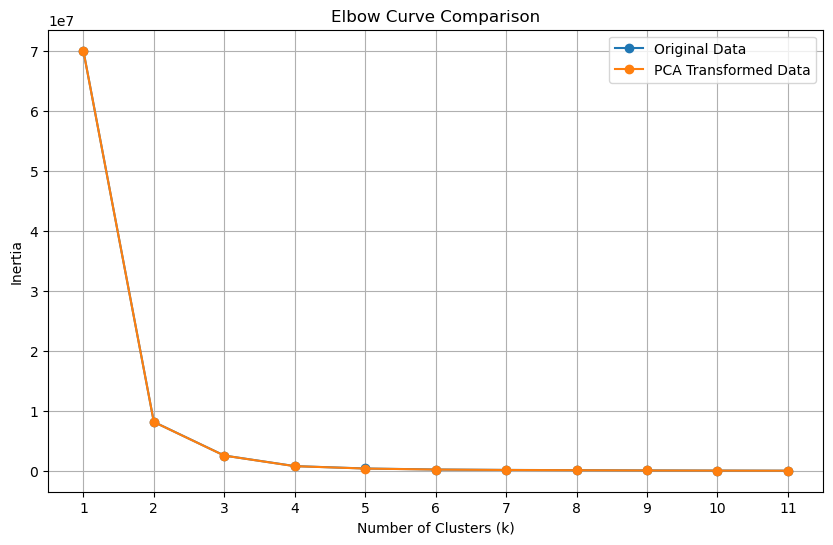

In [236]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', label='Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.grid(True)
plt.xticks(k_values)
plt.plot(k_values, inertia_values_pca, marker='o', linestyle='-', label='PCA Transformed Data')

plt.legend()
plt.show()

In [237]:
# Composite plot to contrast the clusters
scatter_original = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color="Cluster",
    hover_cols=["coin_id"],
    width=400,
    height=300,
    title='Clusters without PCA')

scatter_pca = df_pca_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    color="Cluster",
    hover_cols=["coin_id"],
    width=400,
    height=300,
    title='Clusters with PCA')

# showing the plits
scatter_original + scatter_pca

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PCA1]   (PCA2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 